In [25]:
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv(r"boston_data.csv")

In [27]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [28]:
X = data.drop("MEDV", axis = 1)  # Independent
y = data["MEDV"] # Dependent , Target
X, y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

### Train, Test, Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

## Model Building  with TensorFlow

* Model Init - Defien the network architecture(# Input, Output, HLs, Nodes)
* Model compilation - Defien the type of problem(Loss Function)
* Model Train - Pass dataset, Iteration, Test Data

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.optimizers import Nadam, RMSprop, Adam, Adadelta, Adagrad

In [31]:
model = Sequential() # Empty Model
model.add(Input(13)) # Input Layer 
model.add(Dense(4, activation = "relu"))   # Hidden layer 1
model.add(Dense(1)) # Output


In [32]:
# Model Optimizer
model.compile(optimizer= Adagrad(learning_rate = 0.009) ,loss = "mean_squared_error")

In [33]:
model.fit(x = X_train, y = y_train, epochs=250, validation_data= (X_test, y_test))

Epoch 1/250
12/12 [==============================] - 1s 19ms/step - loss: 1314.4640 - val_loss: 944.4664
Epoch 2/250
12/12 [==============================] - 0s 6ms/step - loss: 840.9652 - val_loss: 685.0825
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 630.2012 - val_loss: 522.1636
Epoch 4/250
12/12 [==============================] - 0s 6ms/step - loss: 513.6768 - val_loss: 434.8156
Epoch 5/250
12/12 [==============================] - 0s 7ms/step - loss: 434.7714 - val_loss: 375.4474
Epoch 6/250
12/12 [==============================] - 0s 6ms/step - loss: 381.4614 - val_loss: 321.8322
Epoch 7/250
12/12 [==============================] - 0s 5ms/step - loss: 338.4607 - val_loss: 284.1816
Epoch 8/250
12/12 [==============================] - 0s 6ms/step - loss: 307.1078 - val_loss: 267.2096
Epoch 9/250
12/12 [==============================] - 0s 7ms/step - loss: 285.7788 - val_loss: 232.4653
Epoch 10/250
12/12 [==============================] - 0s 5ms/step - los

In [34]:
# model.history.history.values()

In [35]:
history = model.history.history
history.keys()

dict_keys(['loss', 'val_loss'])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

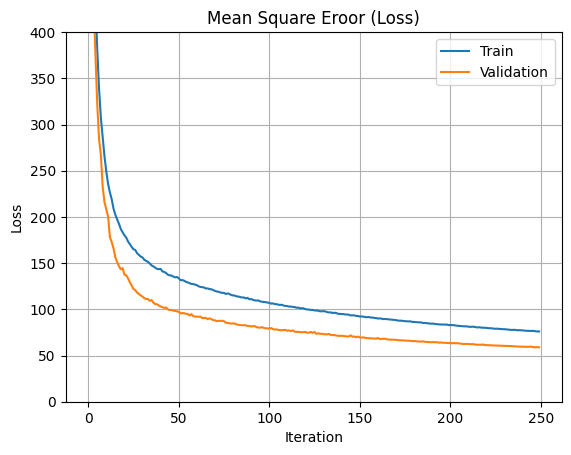

In [37]:
train_loss = history["loss"]
val_loss = history["val_loss"]
plt.plot(train_loss)
plt.plot(val_loss)
plt.ylim(0, 400)
plt.legend(["Train", "Validation"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Mean Square Eroor (Loss)")
plt.grid()

In [38]:
y_pred = model.predict(X_test).flatten()

4/4 [==============================] - 0s 2ms/step


In [39]:
pd.DataFrame({"Actual": y_test, "Preds": y_pred})

,Actual,Preds
410,15.0,14.046094
85,26.6,24.090313
280,45.4,26.778927
422,20.8,18.139187
199,34.9,33.113628
...,...,...
286,20.1,29.321423
437,8.7,2.776334
20,13.6,23.560207
120,22.0,20.461803


In [40]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score   

In [41]:
r2_score(y_test, y_pred)

0.25444876042306774

In [42]:
mean_absolute_percentage_error(y_test, y_pred)

0.26951331920560523

In [43]:
mean_squared_error(y_test, y_pred)

58.855483548324834

In [44]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(13, 4) dtype=float32, numpy=
 array([[-0.3651275 , -0.10809862,  0.20830974, -0.08242239],
        [ 0.52571964, -0.5780683 , -0.21269536, -0.5378893 ],
        [ 0.06739992, -0.3952967 , -0.10028025,  0.22637436],
        [ 0.05904621, -0.26251075,  0.04144868, -0.09542144],
        [ 0.29887217,  0.3441193 , -0.04599796,  0.29912016],
        [-0.20074588, -0.4357624 , -0.08110444,  0.20154677],
        [-0.5067044 ,  0.04637716,  0.21551876,  0.19700517],
        [ 0.35051775, -0.58922946, -0.18846704,  0.40711772],
        [ 0.36760908,  0.3946131 , -0.30283144, -0.60049015],
        [-0.43873972, -0.5347235 ,  0.2500782 ,  0.36593488],
        [-0.44384617,  0.34406775,  0.46058616, -0.10961822],
        [-0.12024748,  0.23476982,  0.39282957,  0.45973963],
        [ 0.00412703,  0.35357982, -0.24125953, -0.0274599 ]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.04480581,  0.1

In [45]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
